# visualization

The `visualization` module provides helper functions for generating consistent figures in `matplotlib`. 

## `basic_figure`

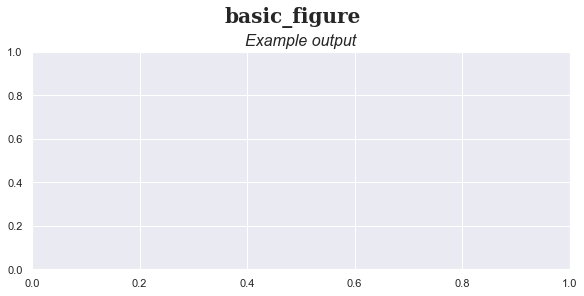

In [1]:
from visualization import basic_figure
shape = 'wrect'
kwargs = dict(suptitle = 'basic_figure', title = 'Example output')

plt, fig, ax = basic_figure(shape, **kwargs)

## `polar_figure`

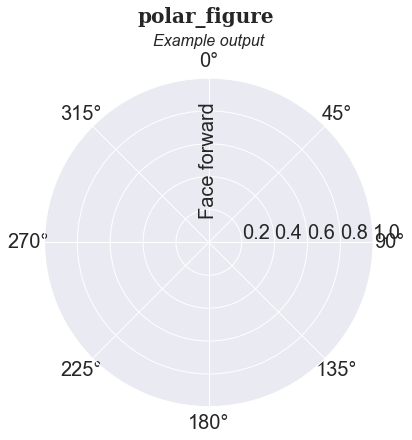

In [2]:
from visualization import polar_figure

shape = 'square'
kwargs = dict(suptitle='polar_figure', title='Example output')

plt, fig, ax = polar_figure(shape, **kwargs)

## `set_parameters`

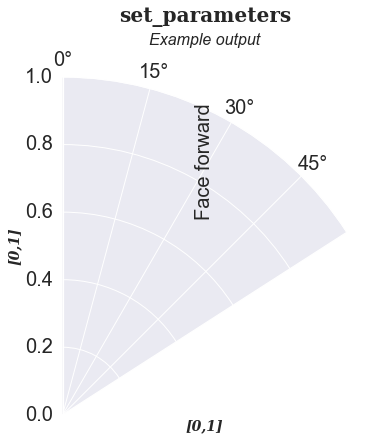

In [3]:
from visualization import set_parameters

kwargs = dict(suptitle='set_parameters', title='Example output', xlim=(0, 1), ylim=(0, 1), xlabel='[0,1]', ylabel='[0,1]')
fig, plt, ax = polar_figure('square', **kwargs)

set_parameters(ax, **kwargs)

## `wave`

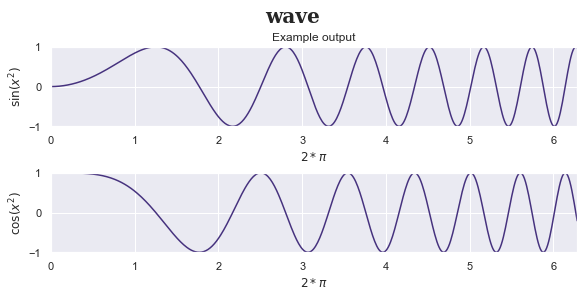

In [4]:
from visualization import wave
import numpy as np

t = np.linspace(0, 2 * np.pi, 500)
x1 = np.sin(t ** 2)
x2 = np.cos(t ** 2)
x = np.array([x1, x2]).transpose()

args = dict(
    t = [t, t],
    suptitle='wave',
    title=['Example output', ''],
    xlim=[(0, 2 * np.pi), (0, 2 * np.pi)],
    ylim=[(-1, 1), (-1, 1)],
    xlabel=[r'$2*\pi$', r'$2*\pi$'],
    ylabel=[r'$\sin(x^2)$', r'$\cos(x^2)$']
)

plt = wave(x, **args)

## `waves`

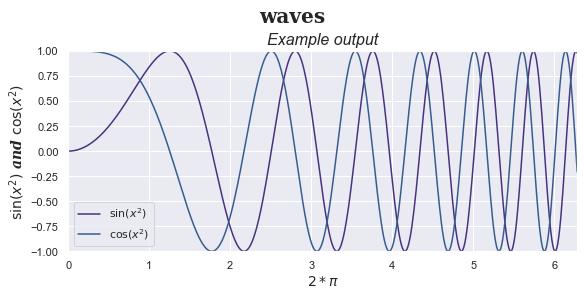

In [5]:
import numpy as np
from visualization import waves

t = np.linspace(0, 2 * np.pi, 500)
x1 = np.sin(t ** 2)
x2 = np.cos(t ** 2)
x = np.array([x1, x2]).transpose()

args = dict(
    t=t,
    suptitle='waves',
    title='Example output',
    xlim=(0, 2 * np.pi),
    ylim=(-1, 1),
    xlabel=r'$2*\pi$',
    ylabel=r'$\sin(x^2)$ and $\cos(x^2)$',
    legend=True,
    legend_labels=[r"$\sin(x^2)$", r"$\cos(x^2)$"]
)

plt = waves(x, **args)

## `spectrogram`

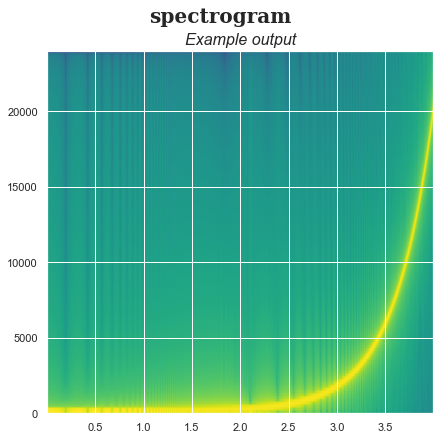

In [6]:
from scipy.signal import chirp
import numpy as np
from visualization import spectrogram

fs = 48000
T = 4
t = np.arange(0, int(T * fs)) / fs
f0 = 1
f1 = 20000
w = chirp(t, f0=f0, f1=f1, t1=T, method='logarithmic')

args = dict(fs=fs, suptitle='spectrogram', title='Example output')

plt = spectrogram(w, **args)

## `spectrum`

<module 'matplotlib.pyplot' from 'C:\\Users\\Jeram\\miniconda3\\envs\\sigr\\lib\\site-packages\\matplotlib\\pyplot.py'>

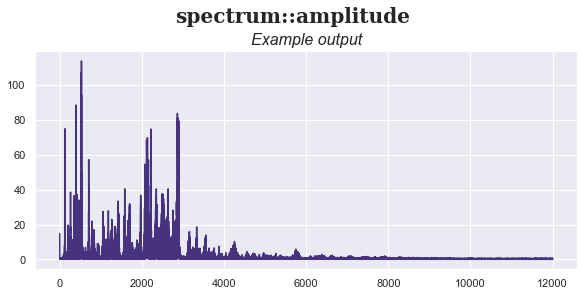

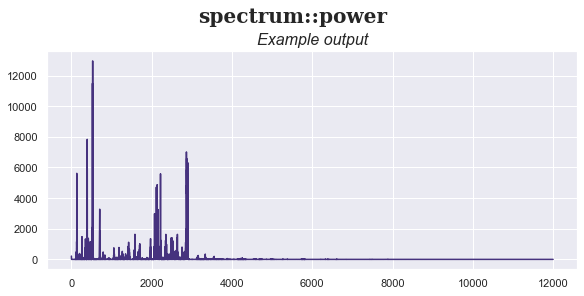

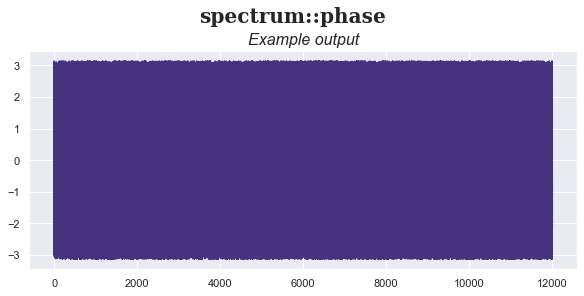

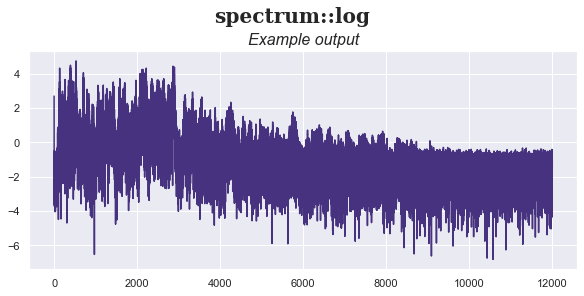

In [7]:
from pydub import AudioSegment
from utils import play_audio, split_channels
from visualization import spectrum

sample_path = './data/sample_data/reflections/samples/mahler_2894305.wav'
s = AudioSegment.from_wav(sample_path)
play_audio(s)

left, right = split_channels(s)

spectrum(left, s.frame_rate, spectrum_type='amplitude', **dict(suptitle='spectrum::amplitude', title='Example output'))
spectrum(left, s.frame_rate, spectrum_type='power', **dict(suptitle='spectrum::power', title='Example output'))
spectrum(left, s.frame_rate, spectrum_type='phase', **dict(suptitle='spectrum::phase', title='Example output'))
spectrum(left, s.frame_rate, spectrum_type='log', **dict(suptitle='spectrum::log', title='Example output'))


## `cepstrum`

<module 'matplotlib.pyplot' from 'C:\\Users\\Jeram\\miniconda3\\envs\\sigr\\lib\\site-packages\\matplotlib\\pyplot.py'>

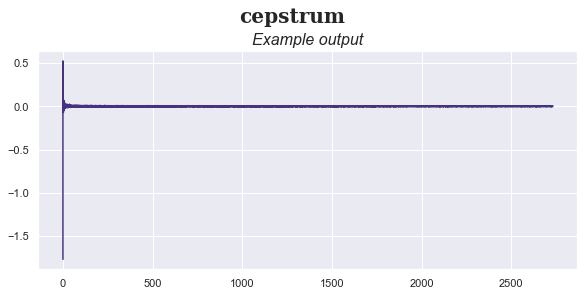

In [8]:
from visualization import cepstrum
import numpy as np

offset = 1024
window_length = offset * 64 * 2

cepstrum(left, s.frame_rate, offset, window_length, **dict(suptitle='cepstrum', title='Example output'))

## `hrtfs`

<module 'matplotlib.pyplot' from 'C:\\Users\\Jeram\\miniconda3\\envs\\sigr\\lib\\site-packages\\matplotlib\\pyplot.py'>

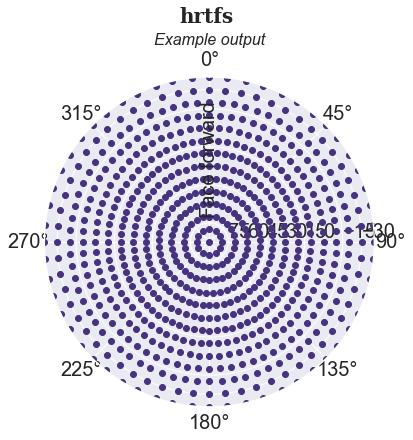

In [9]:
import numpy as np
from visualization import hrtfs
from data_loader import list_hrtf_data

hrtf_data = list_hrtf_data()

azs = []
zes = []

for z in hrtf_data.keys():
    for a in hrtf_data[z]:
        zes.append(z)
        azs.append(a)

azs = np.array(azs)
zes = np.array(zes)

hrtfs(zes, azs, **dict(suptitle='hrtfs', title='Example output'))


## `zenith_range`

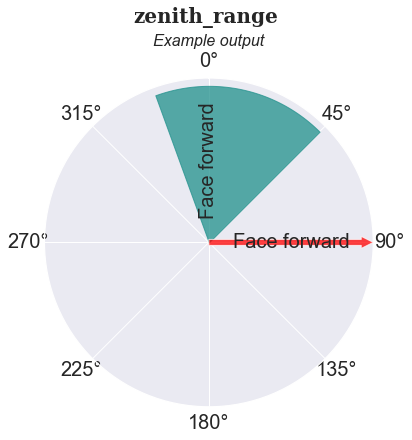

In [10]:
from visualization import zenith_range

zmin = -20
zmax = 45

degree_text = r'$^{\circ}$'
args = dict(suptitle='zenith_range', title='Example output')
plt, _, _, _ = zenith_range(zmin, zmax, **args)

## `azimuth_range`

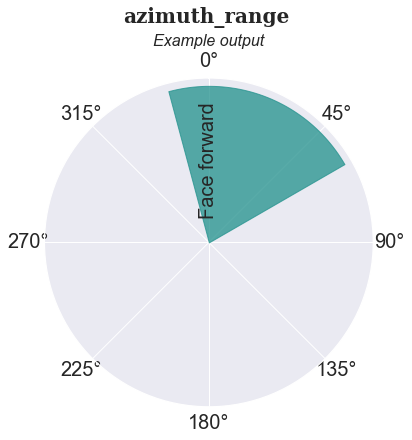

In [11]:
from visualization import azimuth_range

amin = -15
amax = 60

degree_text = r'$^{\circ}$'
args = dict(suptitle='azimuth_range', title='Example output')

plt, _, _, _ = azimuth_range(amin, amax, **args)

## `mfcc`

C:\Users\Jeram\Desktop\sigR\sigr\sigr\visualization.py:198: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=128).
  ax.specgram(x, cmap=color_palette)


<module 'matplotlib.pyplot' from 'C:\\Users\\Jeram\\miniconda3\\envs\\sigr\\lib\\site-packages\\matplotlib\\pyplot.py'>

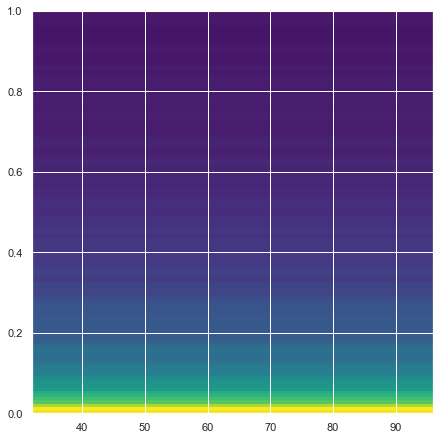

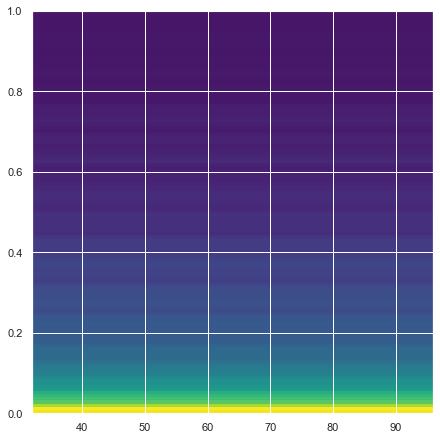

In [12]:
from visualization import mfcc
from utils import array_to_audiosegment, split_channels

left, right = split_channels(s)
left = array_to_audiosegment(left, s.frame_rate)
right = array_to_audiosegment(right, s.frame_rate)
mfcc(left)
mfcc(right)

## `reflections`

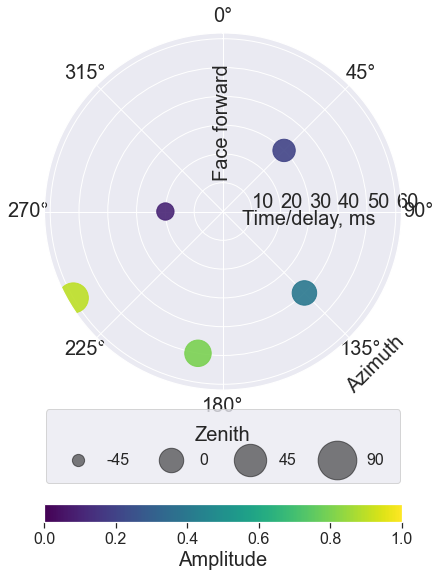

In [13]:
from visualization import reflections

zeniths = [-30, -10, 0, 10, 30]
azimuths = [270, 45, 135, 190, 240]
amplitudes = [0.1, 0.2, 0.4, 0.8, 0.9]
delays = [20, 30, 40, 50, 60]

plt = reflections(zeniths, azimuths, delays, amplitudes)

## `sample`

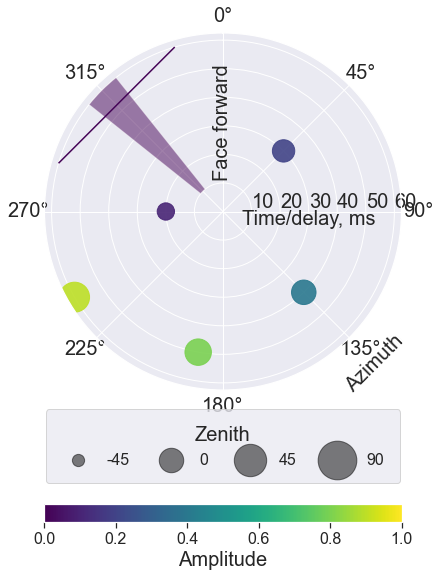

In [14]:
from visualization import sample

zenith = 0
azimuth = 315

amplitude = 0.01
delay = 10
time = 4


plt = sample(zenith, azimuth, zeniths, azimuths, amplitudes, delays, amplitude, delay, time)
